## Apple stork prices - forecasting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('AAPL.csv')

In [3]:
data.head(10)

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
5,5,AAPL,2015-06-03 00:00:00+00:00,130.120,130.940,129.90,130.66,30983542,119.908625,120.664274,119.705890,120.406248,30983542,0.0,1.0
6,6,AAPL,2015-06-04 00:00:00+00:00,129.360,130.580,128.91,129.58,38450118,119.208267,120.332526,118.793582,119.411002,38450118,0.0,1.0
7,7,AAPL,2015-06-05 00:00:00+00:00,128.650,129.690,128.36,129.50,35626800,118.553986,119.512370,118.286744,119.337280,35626800,0.0,1.0
8,8,AAPL,2015-06-08 00:00:00+00:00,127.800,129.210,126.83,128.90,52674786,117.770691,119.070039,116.876813,118.784366,52674786,0.0,1.0
9,9,AAPL,2015-06-09 00:00:00+00:00,127.420,128.080,125.62,126.70,56075420,117.420512,118.028717,115.761770,116.757015,56075420,0.0,1.0


In [4]:
data.shape

(1258, 15)

In [5]:
data.dtypes

Unnamed: 0       int64
symbol          object
date            object
close          float64
high           float64
low            float64
open           float64
volume           int64
adjClose       float64
adjHigh        float64
adjLow         float64
adjOpen        float64
adjVolume        int64
divCash        float64
splitFactor    float64
dtype: object

### Data preprocessing

In [6]:
data.set_index("date", inplace=True)
data.index = pd.to_datetime(data.index)

In [7]:
data = data.drop(['symbol','Unnamed: 0','splitFactor', 'divCash'],axis=1)

In [8]:
data.isnull().sum()

close        0
high         0
low          0
open         0
volume       0
adjClose     0
adjHigh      0
adjLow       0
adjOpen      0
adjVolume    0
dtype: int64

In [9]:
data.duplicated().sum()

0

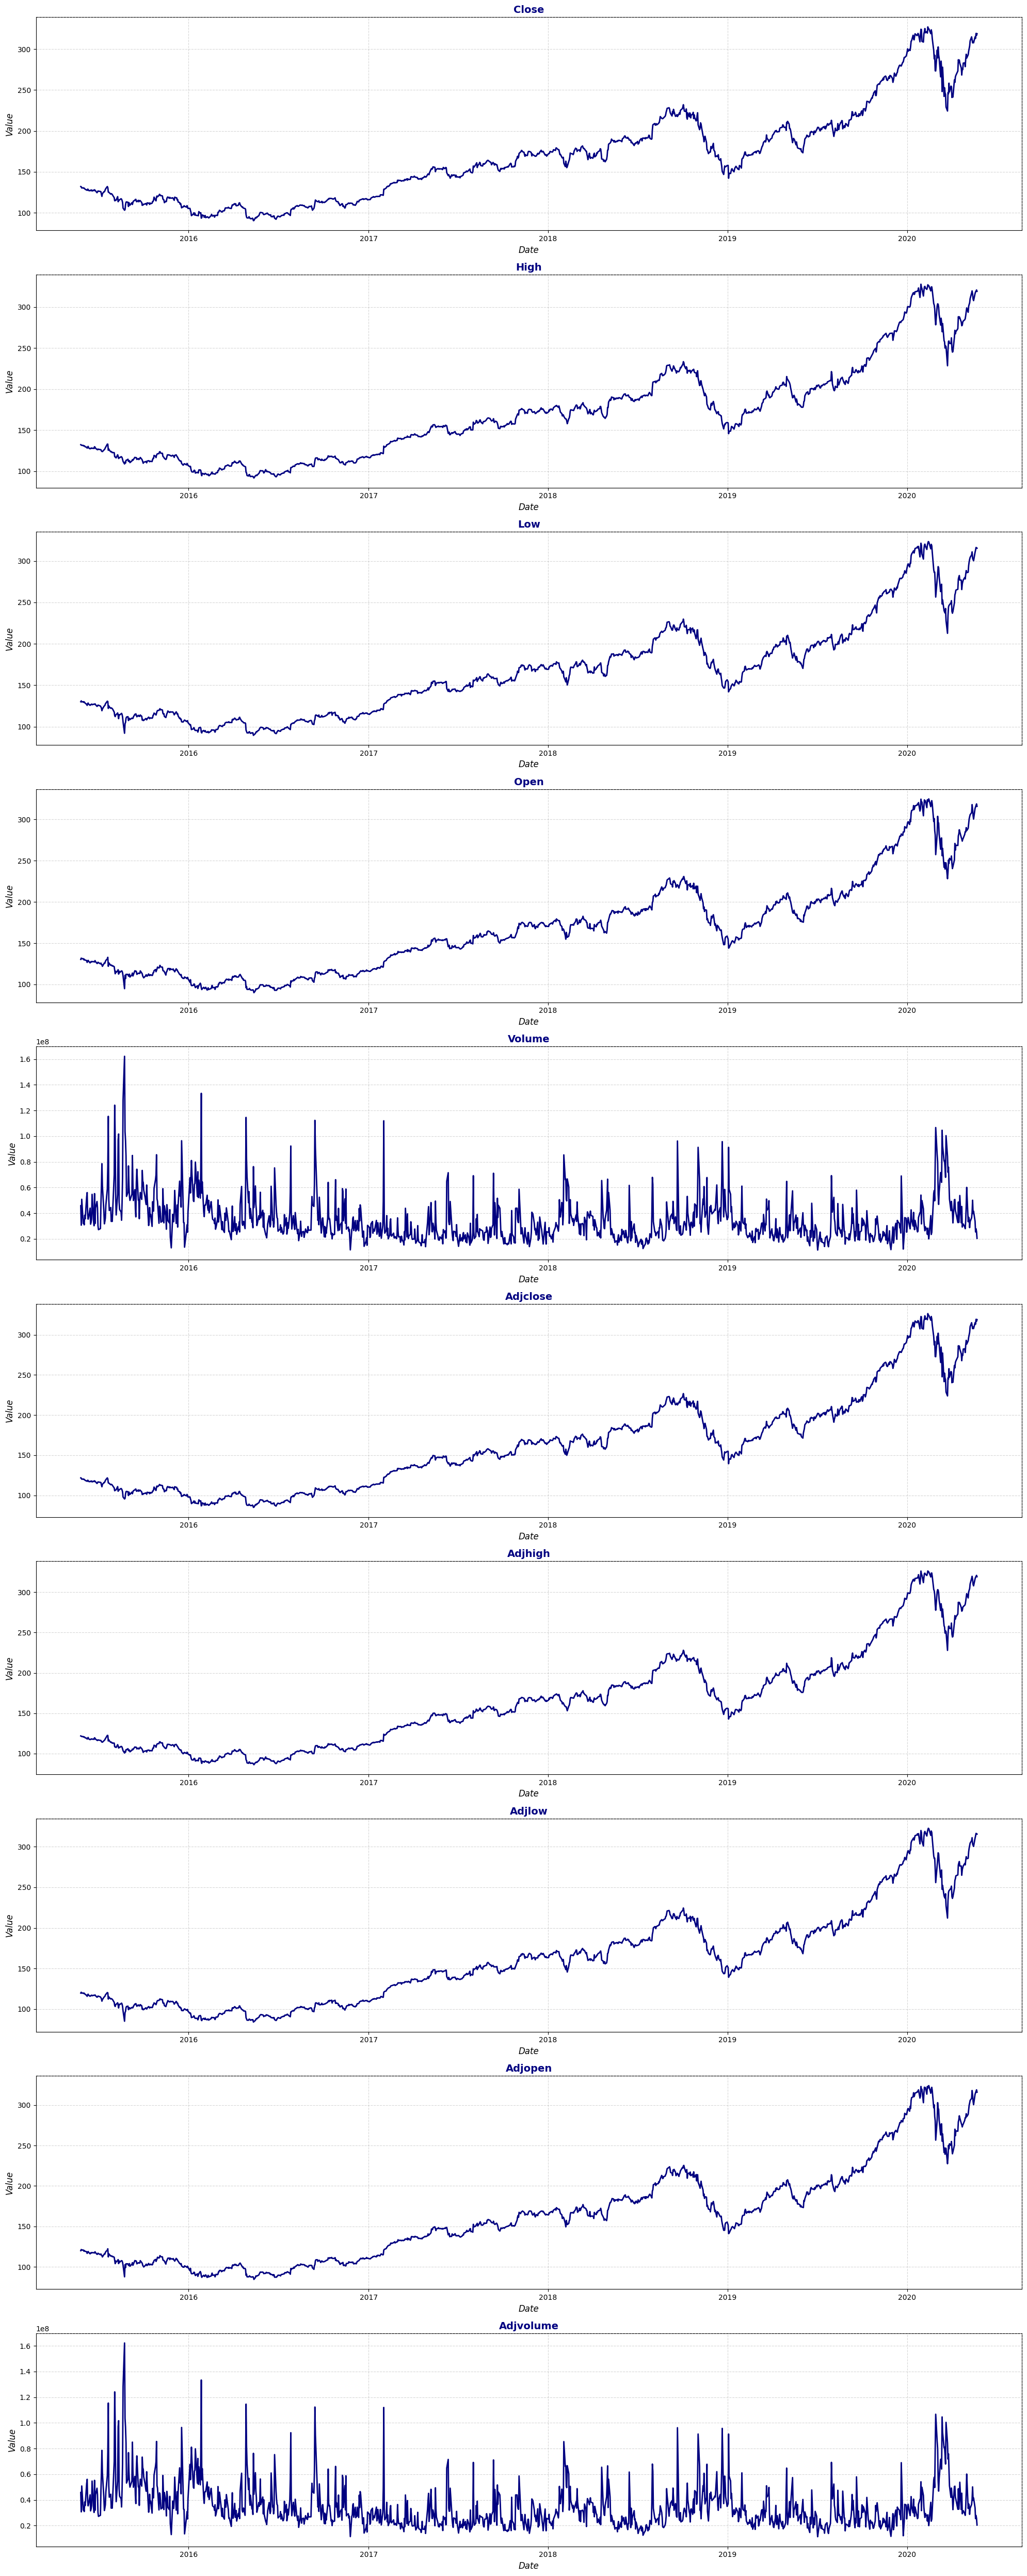

In [10]:
import matplotlib.pyplot as plt

def plot_columns(data, columns):
    num_columns = len(columns)
    fig, axes = plt.subplots(num_columns, 1, figsize=(20, 5*num_columns))
    
    color = 'navy'  # Odabir jedne boje za sve linije
    
    for i, column in enumerate(columns):
        ax = axes[i] if num_columns > 1 else axes
        ax.plot(data[column], color=color, linewidth=2)
        ax.set_title(column.capitalize(), fontsize=14, fontweight='bold', color=color)
        ax.set_xlabel('Date', fontsize=12, fontstyle='italic', color='black')
        ax.set_ylabel('Value', fontsize=12, fontstyle='italic', color='black')
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.tick_params(axis='both', which='major', labelsize=10, colors='black')
        ax.tick_params(axis='both', which='minor', labelsize=8, colors='black')
        ax.spines['top'].set_linestyle('--')
        ax.spines['right'].set_linestyle('--')
    
    plt.tight_layout()
    plt.show()

# Primer korišćenja:
columns = ['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume']
plot_columns(data, columns)


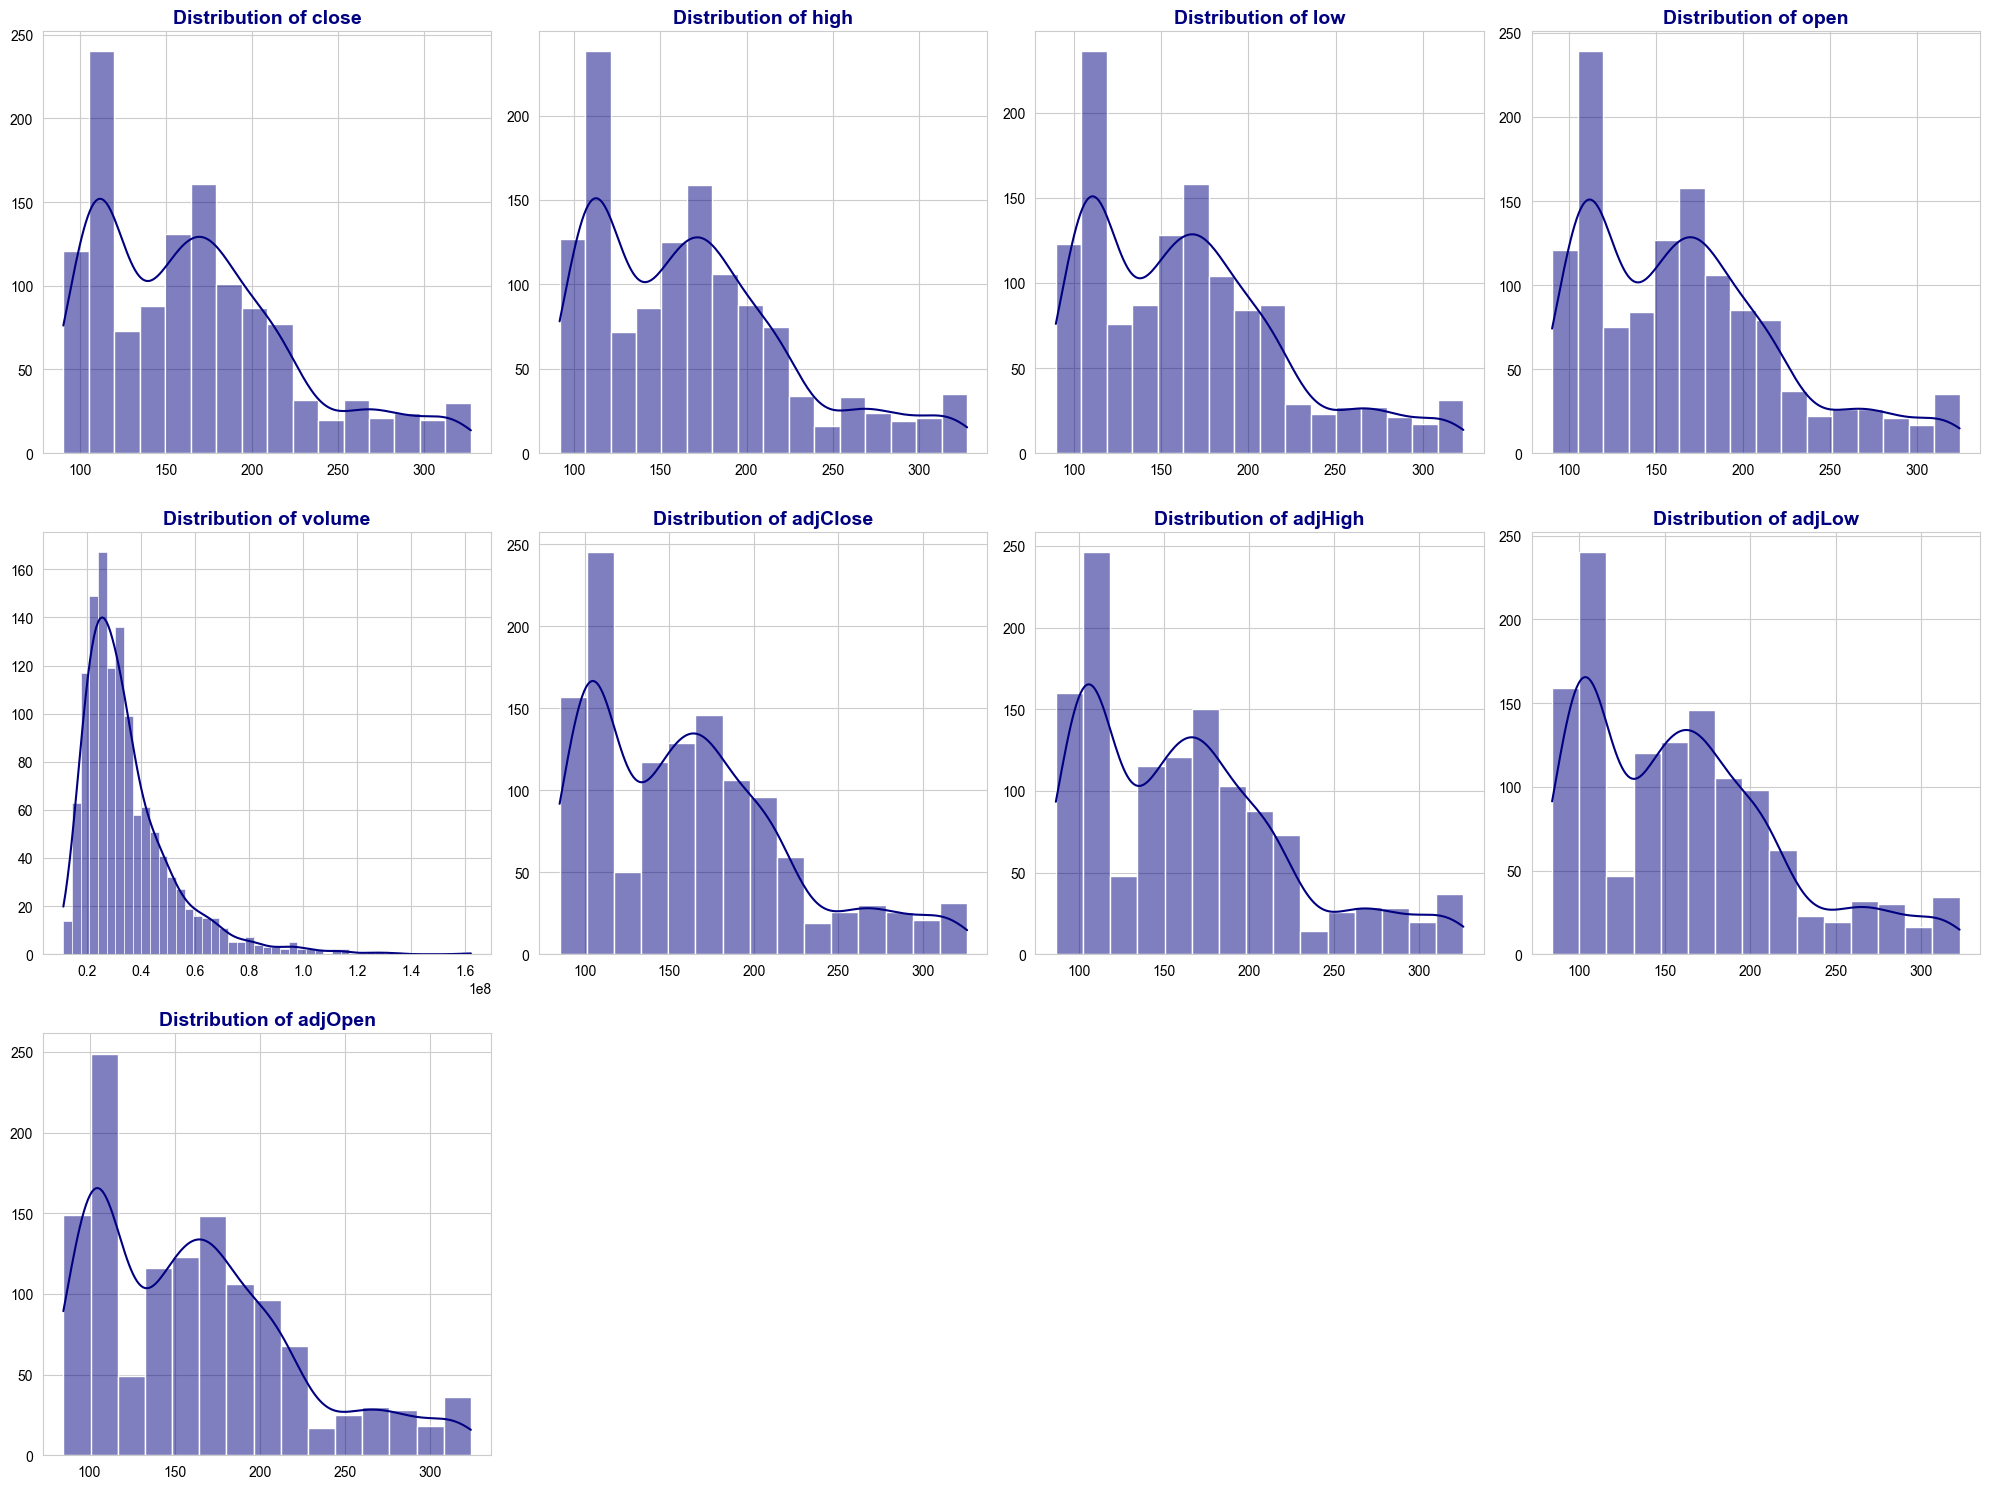

In [11]:

sns.set_style("whitegrid")

num_cols = 4 
num_rows = (len(data.columns) - 2) // num_cols + 1 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))

for i, column in enumerate(data.columns[:]):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(data[column], kde=True, ax=axes[row, col], color='navy')
    axes[row, col].set_title(f'Distribution of {column}', fontsize=14, fontweight='bold', color='navy')
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('')
    axes[row, col].tick_params(axis='both', which='major', labelsize=10, colors='black')
    axes[row, col].tick_params(axis='both', which='minor', labelsize=8, colors='black')

for i in range(len(data.columns[1:]), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


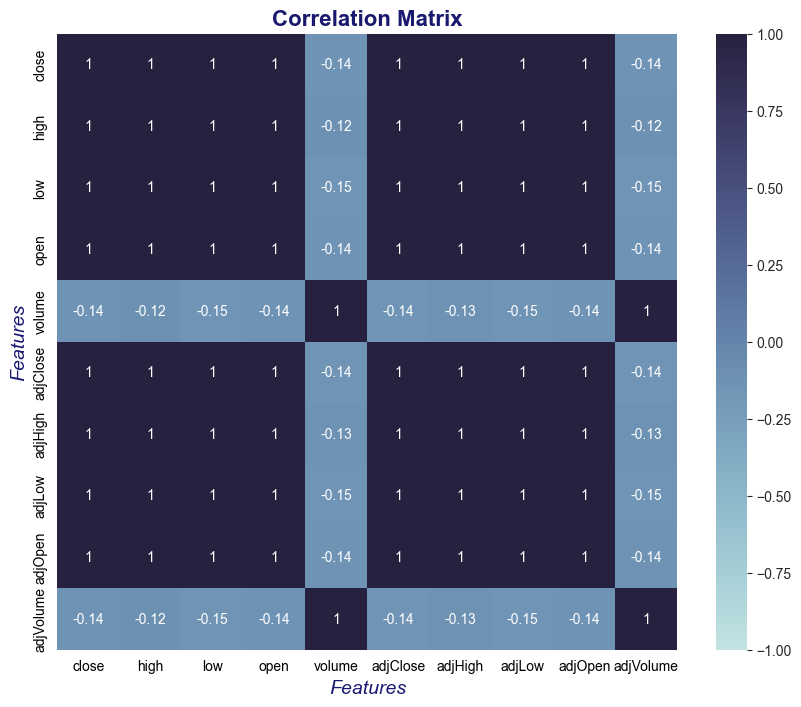

In [12]:
corr_matrix = data.corr()

# Prebaci ovo gore kod definicije funkcija, ovde samo pozovi
def plot_correlation_heatmap(corr_matrix):
    plt.figure(figsize=(10, 8))
    cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
    sns.heatmap(corr_matrix, annot=True, cmap=cmap, vmin=-1, vmax=1)
    plt.title('Correlation Matrix', fontsize=16, fontweight='bold', color='midnightblue')
    plt.xlabel('Features', fontsize=14, fontstyle='italic', color='midnightblue')
    plt.ylabel('Features', fontsize=14, fontstyle='italic', color='midnightblue')
    plt.xticks(fontsize=10, color='black')
    plt.yticks(fontsize=10, color='black')
    plt.show()

plot_correlation_heatmap(corr_matrix)


In [13]:
data.columns

Index(['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh',
       'adjLow', 'adjOpen', 'adjVolume'],
      dtype='object')

In [14]:
import numpy as np

# Izdvajanje samo kolone 'close'
close_prices = data['close']

# Određivanje tačke odsecanja za testiranje (poslednjih 20% podataka)
test_size = int(len(close_prices) * 0.2)

# Podela podataka na train i test skupove
train_data = close_prices[:-test_size]
test_data = close_prices[-test_size:]

# Ispis dimenzija train i test skupova
print("Dimenzije train skupa:", train_data.shape)
print("Dimenzije test skupa:", test_data.shape)

# Pretvaranje u numpy nizove i reshape
train_data = train_data.values.reshape((-1, 1))
test_data = test_data.values.reshape((-1, 1))

# Ispis dimenzija train i test skupova nakon reshape-a
print("Dimenzije train skupa:", train_data.shape)
print("Dimenzije test skupa:", test_data.shape)


Dimenzije train skupa: (1007,)
Dimenzije test skupa: (251,)
Dimenzije train skupa: (1007, 1)
Dimenzije test skupa: (251, 1)


In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [67]:
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(np.array(data).reshape(-1,1))

In [68]:
train_size = int(len(data_scaled) * 0.75)

trainData, testData = data_scaled[0:train_size, :], data_scaled[train_size:len(data_scaled), :]


print("Dimenzije train_data:", train_data.shape)
print("Dimenzije test_data:", test_data.shape)


Dimenzije train_data: (1007, 1)
Dimenzije test_data: (251, 1)


In [16]:
def create_sequences(data, sequence_length):
    X, y = [], []

    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])

    return np.array(X), np.array(y)

In [17]:
sequence_length = 10
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [18]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [19]:
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint(
    'best_model.keras', monitor='val_loss', save_best_only=True)

In [20]:
def plot_train_history(history):
    plt.figure(figsize=(15, 6))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title('Training and Validation Loss', fontsize=16, fontweight='bold', color='navy')
    plt.xlabel('Epochs', fontsize=14, fontstyle='italic', color='black')
    plt.ylabel('Loss', fontsize=14, fontstyle='italic', color='black')
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(fontsize=10, color='black')
    plt.yticks(fontsize=10, color='black')
    plt.show()


In [21]:
import sklearn.metrics as metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, mean_squared_log_error

all_results = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'R2', 'MSE', 'MAPE', 'MSLE'])

def test_model(model, model_name, X_test, y_test, end=-1):    
    X_test = X_test[:end]
    y_test = y_test[:end]
    y_pred = model.predict(X_test).flatten()
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    msle = mean_squared_log_error(y_test, y_pred)
    all_results.loc[len(all_results)] = [model_name, rmse, mae, r2, mse, mape, msle]

    plt.figure(figsize=(15, 6))
    plt.plot(y_test, label='True', color='blue')
    plt.plot(y_pred, label='Predicted', color='orange')
    plt.title(f'{model_name} Predictions', fontsize=16, fontweight='bold', color='navy')
    plt.xlabel('Time', fontsize=14, fontstyle='italic', color='black')
    plt.ylabel('Value', fontsize=14, fontstyle='italic', color='black')
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(fontsize=10, color='black')
    plt.yticks(fontsize=10, color='black')
    plt.show()

    display(all_results[-1:])

# Dodatne metrike
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100




In [22]:
from keras.layers import SimpleRNN
from tensorflow import optimizers

model_srnn = Sequential()

model_srnn.add(SimpleRNN(units = 20,
                         activation = "relu",
                         return_sequences = False,
                         input_shape = (X_train.shape[1],1)))

model_srnn.add(Dense(20, activation='relu'))

model_srnn.add(Dense(units = 1))

model_srnn.compile(optimizer="adam",
                  loss = "mean_squared_error")

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
history = model_srnn.fit(X_train, y_train,
                    epochs=200, batch_size=32,
                    validation_split=0.1)

Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.2035 - val_loss: 0.1827
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0553 - val_loss: 0.0045
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0033 - val_loss: 9.0920e-04
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.9825e-04 - val_loss: 7.8059e-04
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6766e-04 - val_loss: 6.8406e-04
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.6014e-04 - val_loss: 7.8514e-04
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.2867e-04 - val_loss: 6.9267e-04
Epoch 8/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0255e-04 - val_loss: 6.7839e-04
Epoch 9/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7390e-04 - val_loss: 6.6947e-04
Epoch 10/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4310e-04 - val_loss: 6.5574e-04
Epoch 11/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4051e-04 - val_loss: 6.525

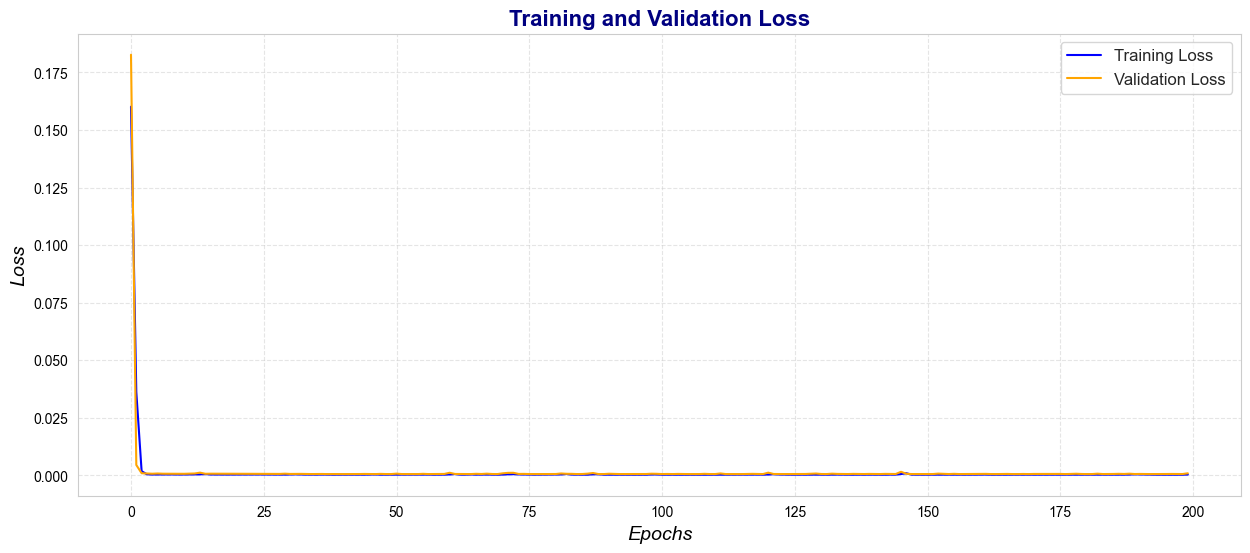

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


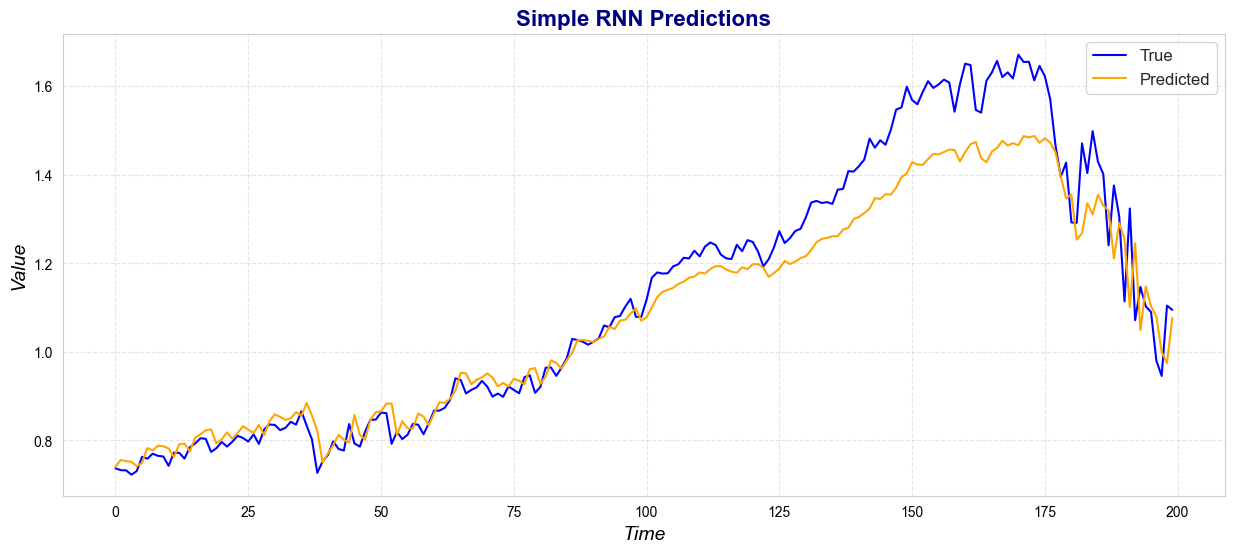

,Model,RMSE,MAE,R2,MSE,MAPE,MSLE
0,Simple RNN,0.083724,0.06056,0.919487,0.00701,28.098644,0.00125


In [24]:
from keras.models import load_model
plot_train_history(history)
# best_model = load_model('best_model.keras')
test_model(model_srnn, 'Simple RNN',
           X_test, y_test, 200)

In [28]:
model_complex = Sequential()
model_complex.add(SimpleRNN(50, return_sequences=True, input_shape=(100, 1)))
model_complex.add(Dropout(0.2))
model_complex.add(SimpleRNN(50, return_sequences=True))
model_complex.add(Dropout(0.2))
model_complex.add(SimpleRNN(50))
model_complex.add(Dropout(0.2))
model_complex.add(Dense(1))
model_complex.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate=0.00001))
model_complex.summary()

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 100, 50)        │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 100, 50)        │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,751 (49.81 KB)

 Trainable params: 12,751 (49.81 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history_complex = model_complex.fit(X_train, y_train,
                    epochs=200, batch_size=32,
                    validation_split=0.1)

Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 1.2426 - val_loss: 0.0197
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2501 - val_loss: 0.0196
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2115 - val_loss: 0.0245
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1702 - val_loss: 0.0376
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1570 - val_loss: 0.0411
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1793 - val_loss: 0.0234
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1555 - val_loss: 0.0279
Epoch 8/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1365 - val_loss: 0.0478
Epoch 9/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1301 - val_loss: 0.0307
Epoch 10/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1228 - val_loss: 0.0502
Epoch 11/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1093 - val_loss: 0.0312
Epoch 12/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

### Data preprocessing

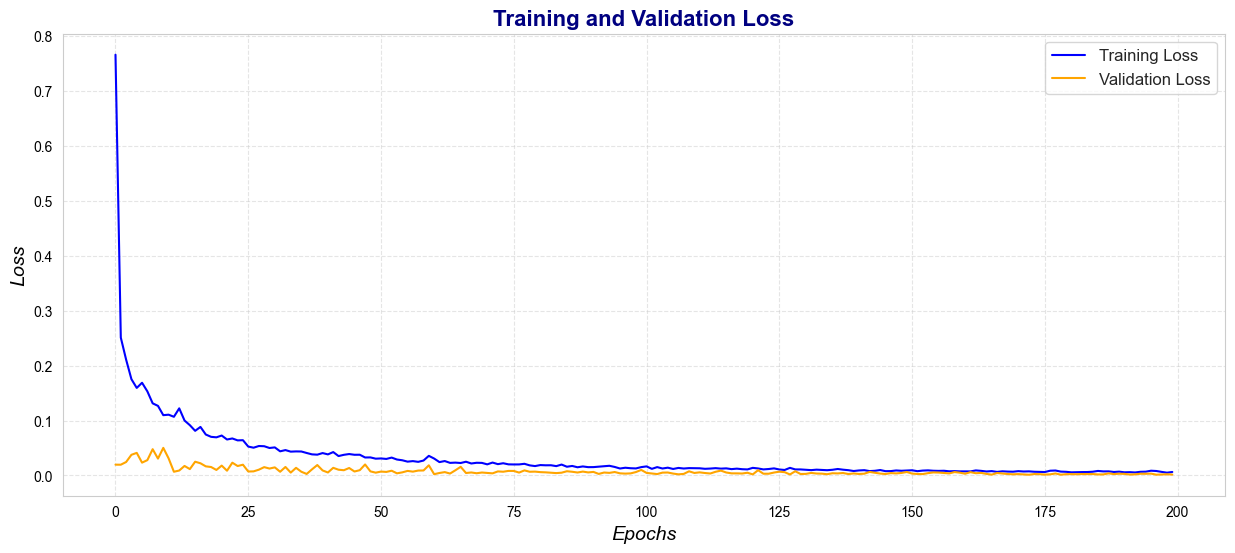

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


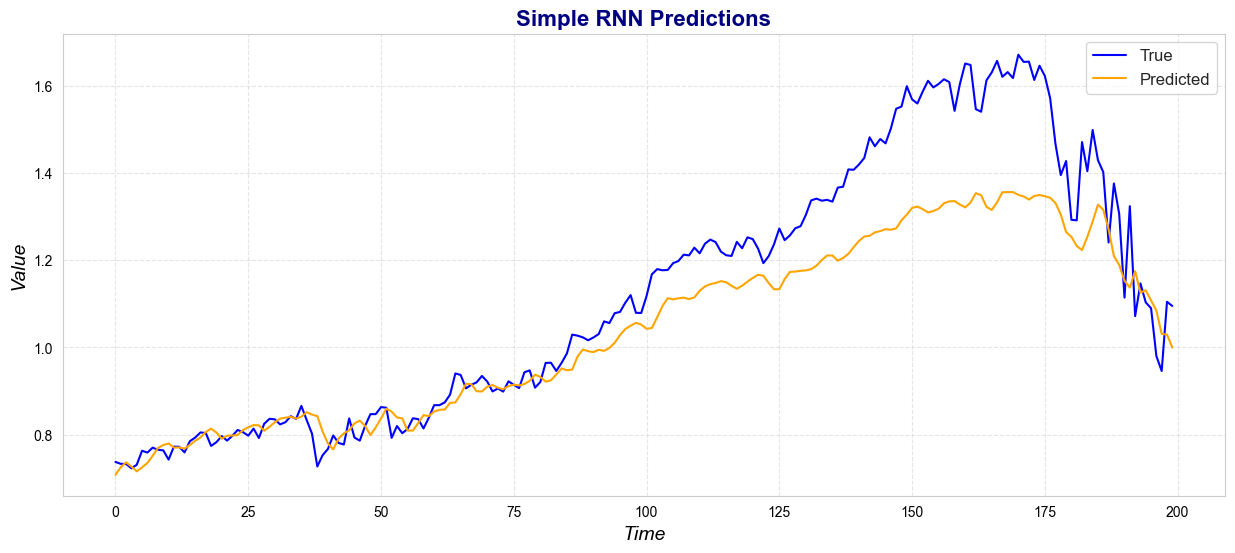

,Model,RMSE,MAE,R2,MSE,MAPE,MSLE
2,Simple RNN,0.132845,0.093181,0.7973,0.017648,26.38545,0.003113


In [30]:
plot_train_history(history_complex)
# best_model = load_model('best_model.keras')
test_model(model_complex, 'Simple RNN',
           X_test, y_test, 200)

In [47]:
model_sequential = Sequential()
model_sequential.add(SimpleRNN(50, input_shape=(100, 1)))
model_sequential.add(Dense(1))
model_sequential.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate=0.00001))
model_sequential.summary()

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_8 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
history = model_sequential.fit(X_train, y_train,
                    epochs=10, batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stopping, checkpoint])

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0511 - val_loss: 0.0781
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0317 - val_loss: 0.0496
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0236 - val_loss: 0.0318
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0188 - val_loss: 0.0214
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0142 - val_loss: 0.0159
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0119 - val_loss: 0.0126
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113 - val_loss: 0.0109
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - val_loss: 0.0101
Epoch 9/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - val_loss: 0.0090
Epoch 10/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0091 - val_loss: 0.0086


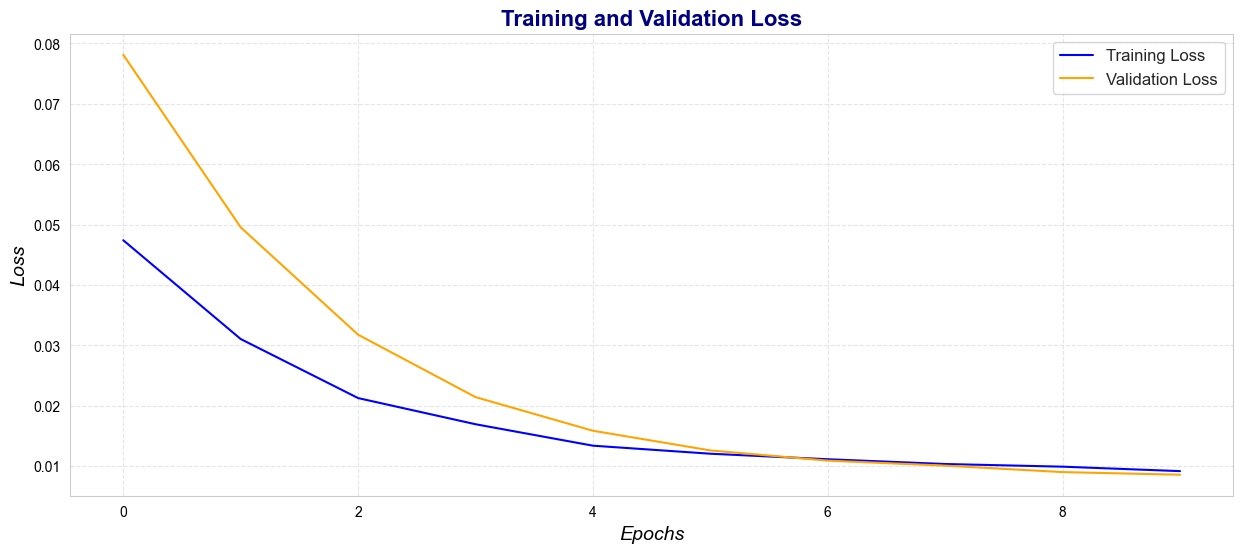

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


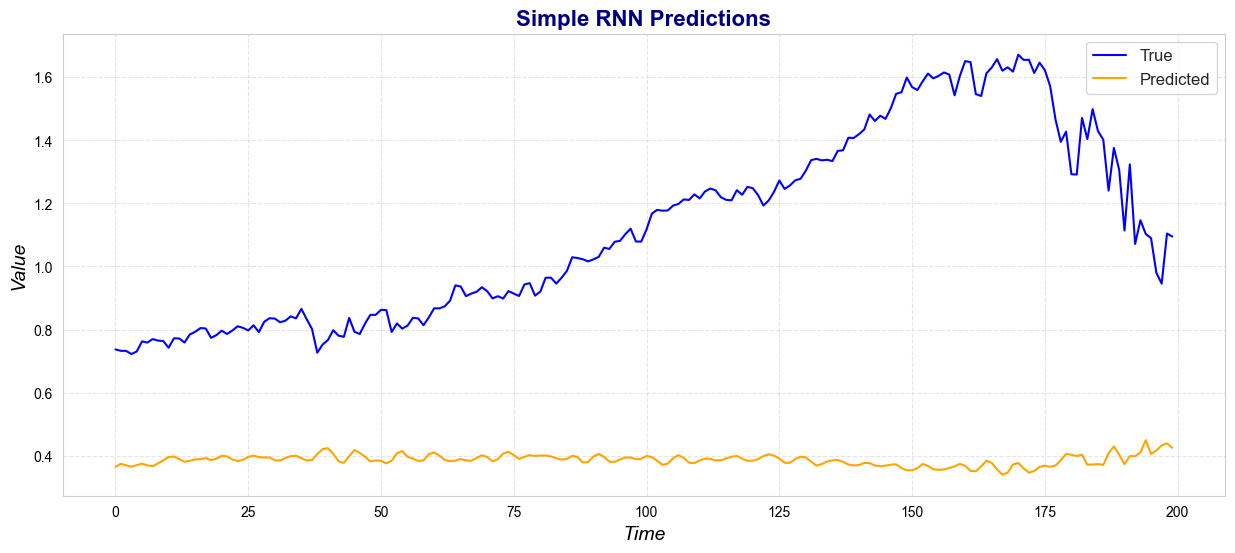

,Model,RMSE,MAE,R2,MSE,MAPE,MSLE
8,Simple RNN,0.794376,0.733815,-6.24799,0.631033,63.058016,0.193127


In [49]:
plot_train_history(history)
best_model = load_model('best_model.keras')
test_model(model_sequential, 'Simple RNN',
           X_test, y_test, 200)

In [50]:
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(100, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate=0.00001))
model_lstm.summary()

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
history_lstm = model_lstm.fit(X_train, y_train,
                    epochs=50, batch_size=32,
                    validation_split=0.1)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2729 - val_loss: 0.5749
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2842 - val_loss: 0.5567
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2749 - val_loss: 0.5390
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2531 - val_loss: 0.5217
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2668 - val_loss: 0.5047
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2630 - val_loss: 0.4874
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2355 - val_loss: 0.4714
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2415 - val_loss: 0.4559
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2141 - val_loss: 0.4400
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2068 - val_loss: 0.4253
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1984 - val_loss: 0.4103
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1913 - val_l

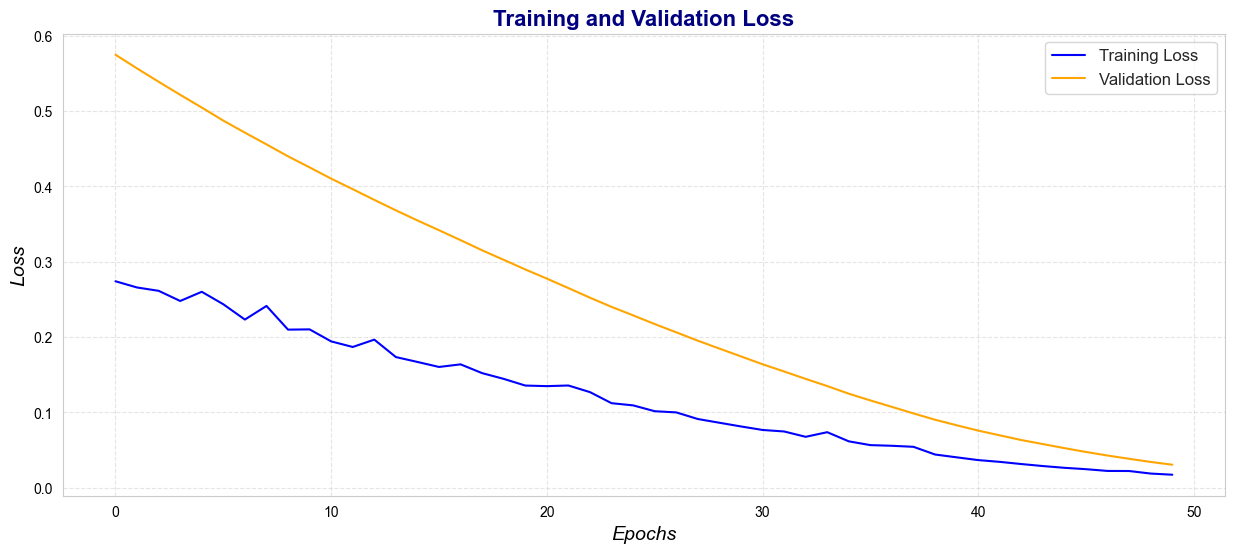

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


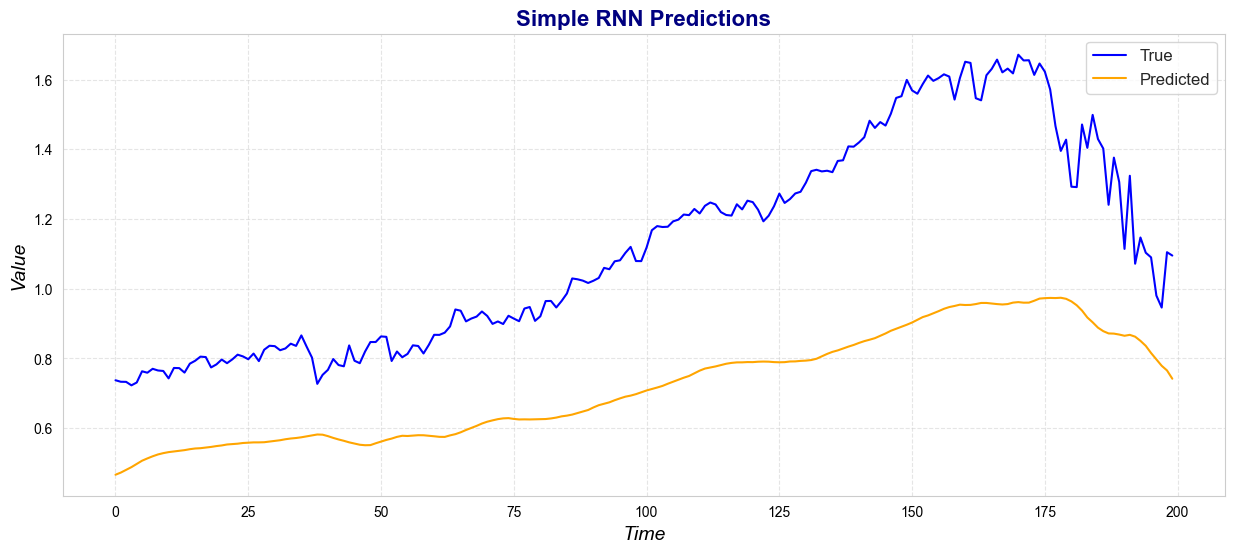

,Model,RMSE,MAE,R2,MSE,MAPE,MSLE
9,Simple RNN,0.429254,0.400745,-1.116386,0.184259,34.215813,0.044768


In [52]:
plot_train_history(history_lstm)
best_model = load_model('best_model.keras')
test_model(model_lstm, 'Simple RNN',
           X_test, y_test, 200)

In [53]:
model_multiple_lstm = Sequential()
model_multiple_lstm.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model_multiple_lstm.add(LSTM(50))
model_multiple_lstm.add(Dense(1))
model_multiple_lstm.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate=0.00001))
model_multiple_lstm.summary()

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
history_multiple_lstm = model_multiple_lstm.fit(X_train, y_train,
                    epochs=100, batch_size=64,
                    validation_split=0.1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - loss: 0.2300 - val_loss: 0.5111
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2287 - val_loss: 0.4993
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2326 - val_loss: 0.4872
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2182 - val_loss: 0.4753
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1983 - val_loss: 0.4640
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2089 - val_loss: 0.4540
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2092 - val_loss: 0.4439
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2048 - val_loss: 0.4337
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1899 - val_loss: 0.4241
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1851 - val_loss: 0.4142
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1831 - val_loss: 0.4037
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

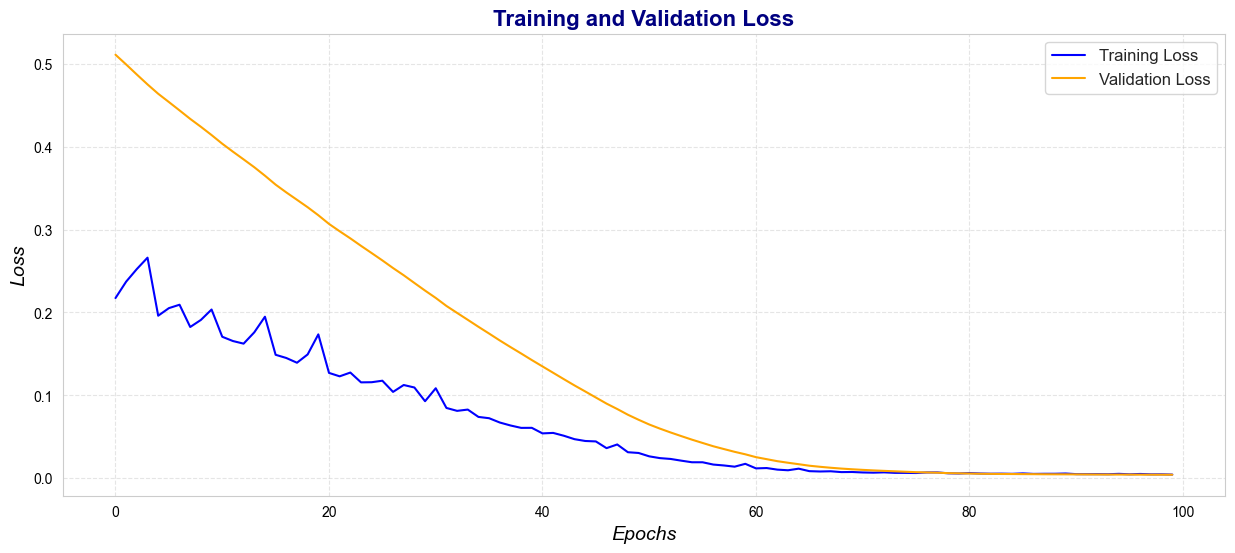

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step


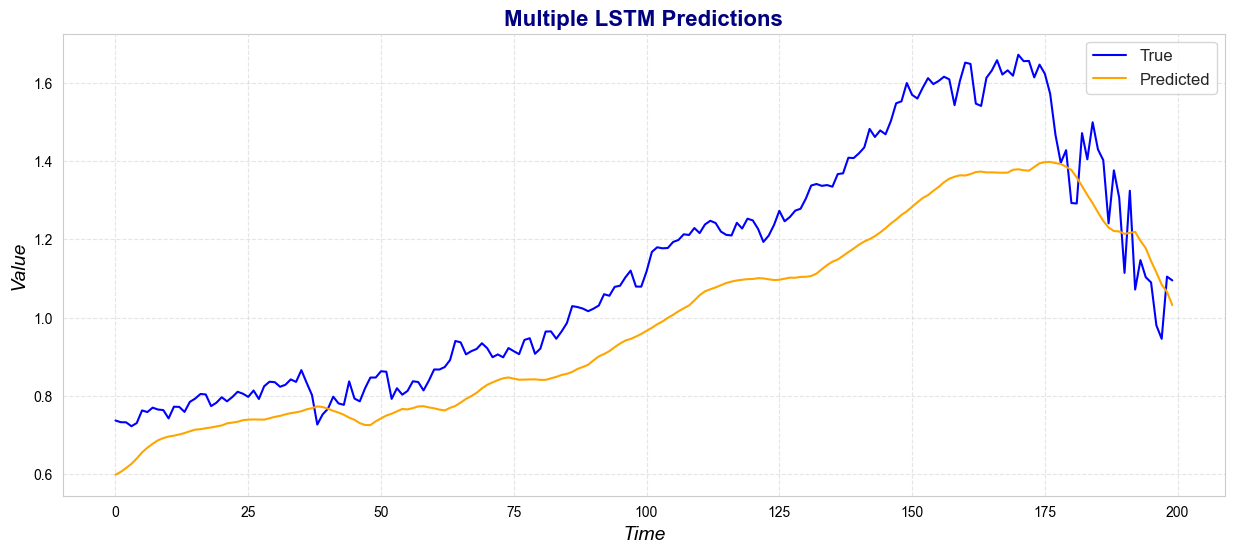

,Model,RMSE,MAE,R2,MSE,MAPE,MSLE
10,Multiple LSTM,0.157274,0.138078,0.715895,0.024735,28.265932,0.005041


In [55]:
plot_train_history(history_multiple_lstm)
best_model = load_model('best_model.keras')
test_model(model_multiple_lstm, 'Multiple LSTM',
           X_test, y_test, 200)

In [56]:
model_lstm_dropout = Sequential()
model_lstm_dropout.add(LSTM(50, input_shape=(100, 1)))
model_lstm_dropout.add(Dropout(0.2))
model_lstm_dropout.add(Dense(1))
model_lstm_dropout.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate=0.00001))
model_lstm_dropout.summary()

c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
history_lstm_dropout = model_lstm_dropout.fit(X_train, y_train,
                    epochs=120, batch_size=32,
                    validation_split=0.1)

Epoch 1/120
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2856 - val_loss: 0.5802
Epoch 2/120
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2811 - val_loss: 0.5622
Epoch 3/120
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2866 - val_loss: 0.5445
Epoch 4/120
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2718 - val_loss: 0.5278
Epoch 5/120
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2382 - val_loss: 0.5111
Epoch 6/120
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2543 - val_loss: 0.4952
Epoch 7/120
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2391 - val_loss: 0.4793
Epoch 8/120
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2351 - val_loss: 0.4640
Epoch 9/120
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2318 - val_loss: 0.4480
Epoch 10/120
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2184 - val_loss: 0.4337
Epoch 11/120
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2106 - val_loss: 0.4193
Epoch 12/120
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.

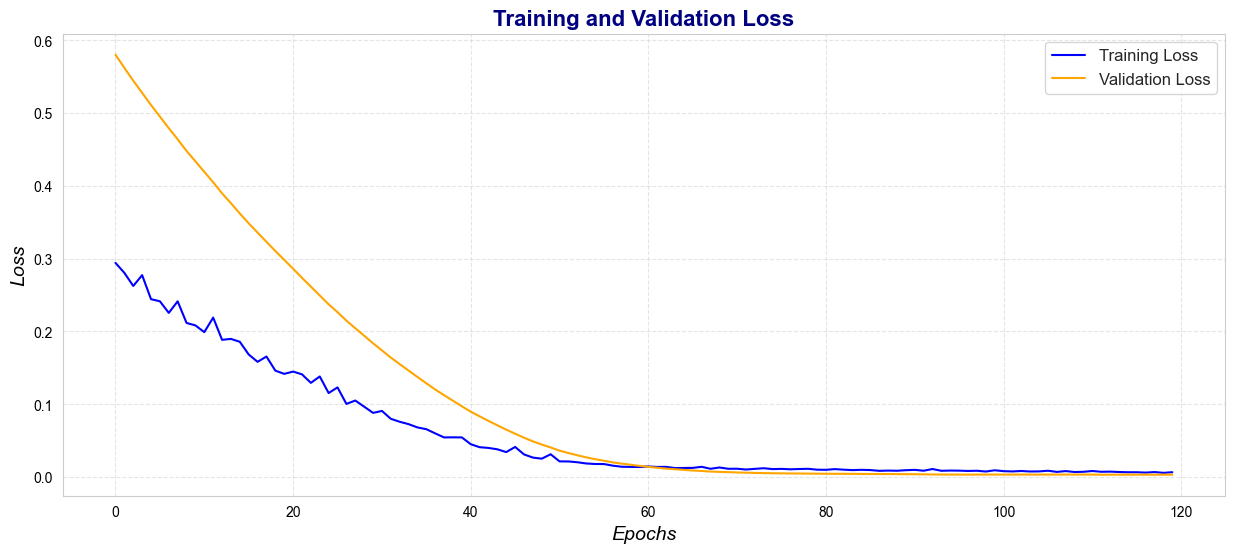

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


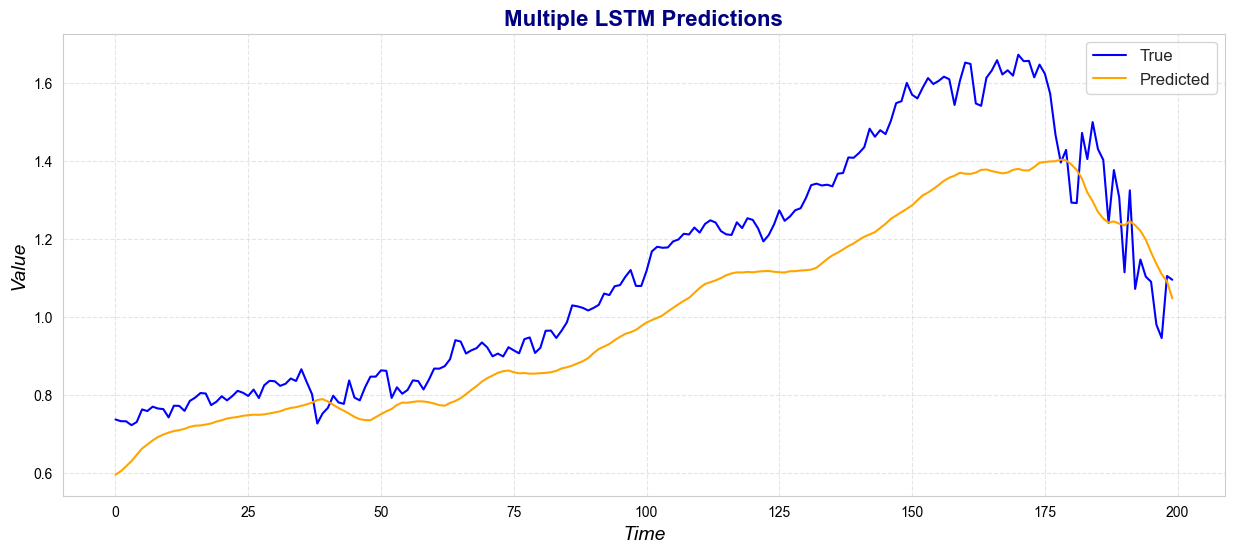

,Model,RMSE,MAE,R2,MSE,MAPE,MSLE
11,Multiple LSTM,0.149867,0.129235,0.742026,0.02246,28.159309,0.004488


In [58]:
plot_train_history(history_lstm_dropout)
best_model = load_model('best_model.keras')
test_model(model_lstm_dropout, 'Multiple LSTM',
           X_test, y_test, 200)

In [59]:
model_multiple_lstm_dropout = Sequential()
model_multiple_lstm_dropout.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model_multiple_lstm_dropout.add(Dropout(0.2))
model_multiple_lstm_dropout.add(LSTM(50, return_sequences=True))
model_multiple_lstm_dropout.add(Dropout(0.2))
model_multiple_lstm_dropout.add(LSTM(50))
model_multiple_lstm_dropout.add(Dropout(0.2))
model_multiple_lstm_dropout.add(Dense(1))
model_multiple_lstm_dropout.compile(loss='mean_squared_error', optimizer=optimizers.Adam(learning_rate=0.00001))
model_multiple_lstm_dropout.summary()


c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
history_multiple_lstm_dropout = model_multiple_lstm_dropout.fit(X_train, y_train,
                    epochs=100, batch_size=32,
                    validation_split=0.1)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0831 - val_loss: 0.0036
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0058 - val_loss: 0.0042
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0037 - val_loss: 0.0070
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0055 - val_loss: 0.0034
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0037 - val_loss: 0.0046
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0039 - val_loss: 0.0051
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0028 - val_loss: 0.0033
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0027 - val_loss: 0.0029
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step

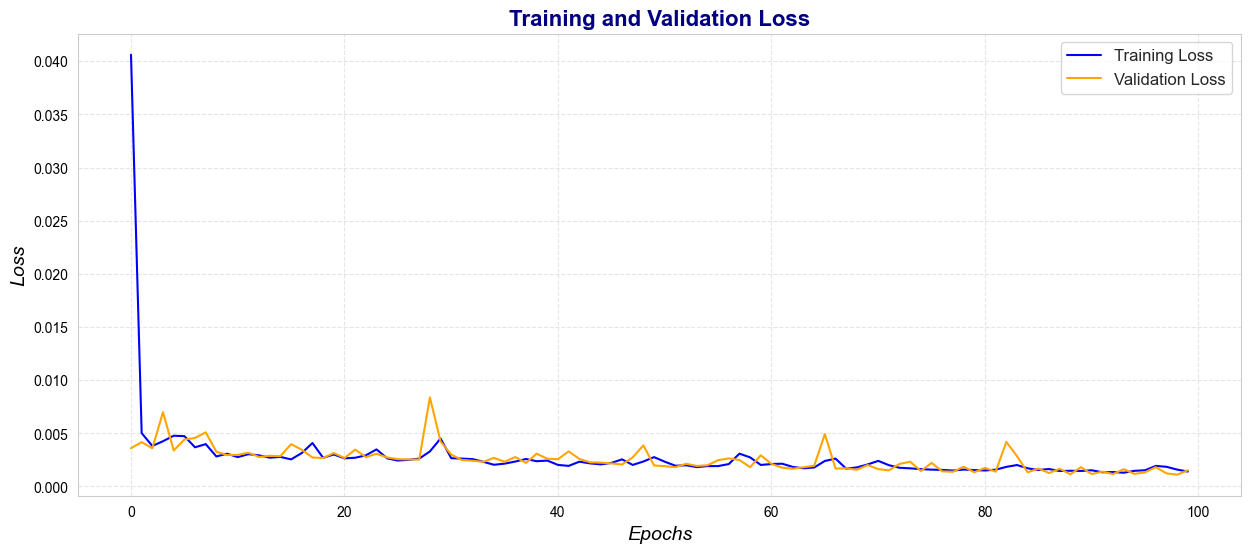

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


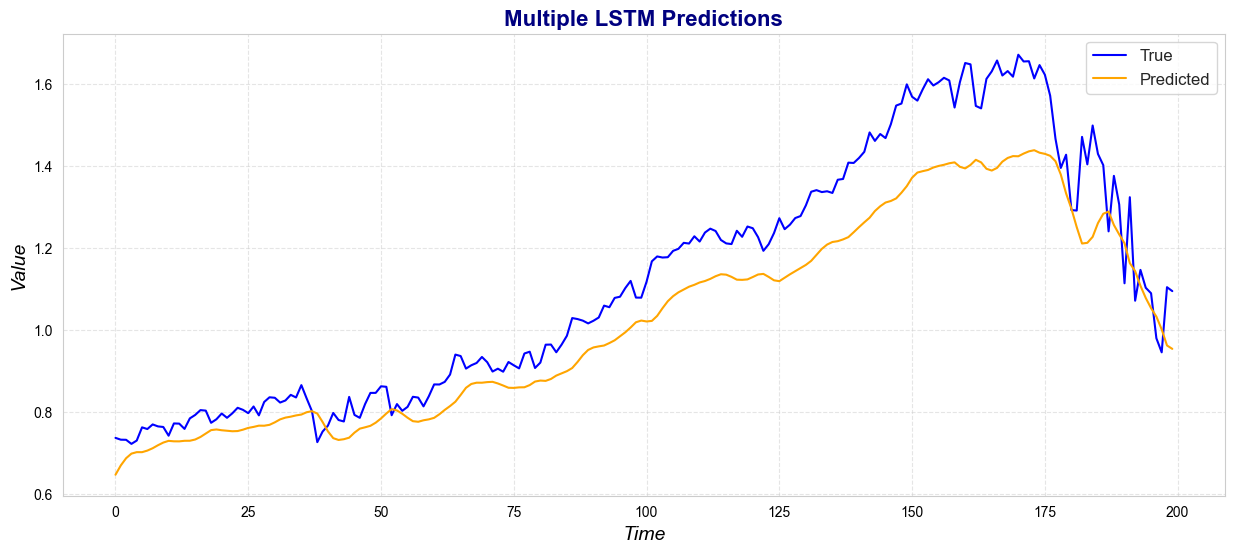

,Model,RMSE,MAE,R2,MSE,MAPE,MSLE
12,Multiple LSTM,0.119722,0.100828,0.835369,0.014333,28.075826,0.002747


In [61]:
plot_train_history(history_multiple_lstm_dropout)
best_model = load_model('best_model.keras')
test_model(model_multiple_lstm_dropout, 'Multiple LSTM',
           X_test, y_test, 200)

In [62]:
from keras.layers import GRU

model_lstm_gru = Sequential()
model_lstm_gru.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model_lstm_gru.add(GRU(50, return_sequences=True))
model_lstm_gru.add(LSTM(50))
model_lstm_gru.add(Dense(1))
model_lstm_gru.compile(loss='mean_squared_error', optimizer='adam')
model_lstm_gru.summary()


c:\Users\Kaca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                  │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 100, 50)        │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,951 (179.50 KB)

 Trainable params: 45,951 (179.50 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
history_lstm_gru = model_lstm_gru.fit(X_train, y_train,
                    epochs=100, batch_size=32,
                    validation_split=0.1)

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0015 - val_loss: 0.0027
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0012 - val_loss: 0.0025
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0011 - val_loss: 0.0027
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0013 - val_loss: 0.0023
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0011 - val_loss: 0.0029
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0013 - val_loss: 0.0027
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0021 - val_loss: 0.0030
Epoch 9/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 10/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0012 - val_loss: 0.0024
Epoch 11/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0012 - val_loss: 0.0021
Epoch 12/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step

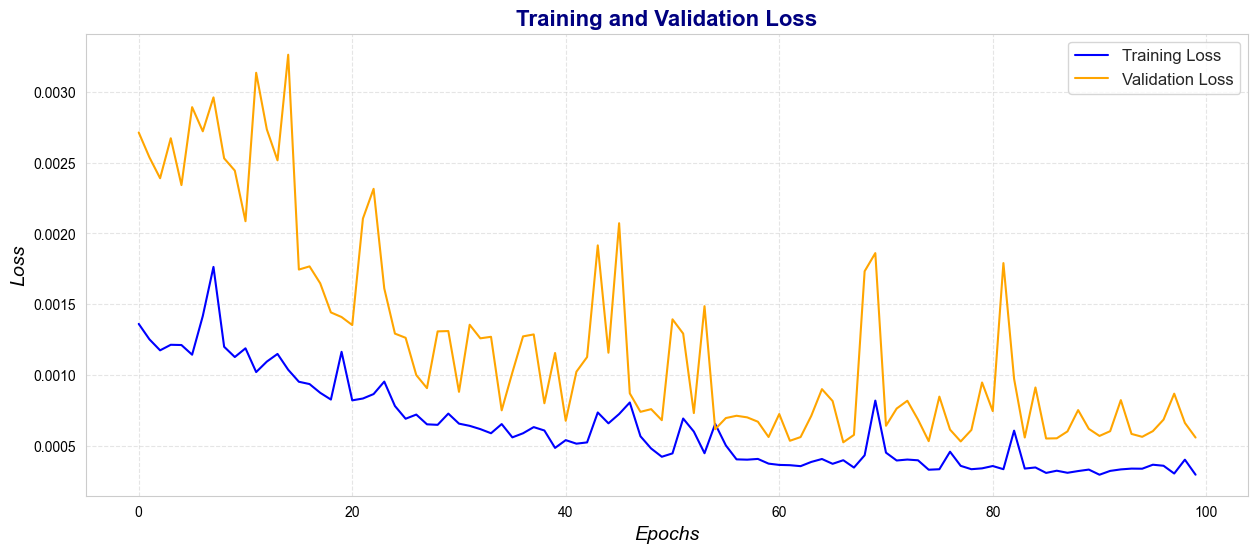

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


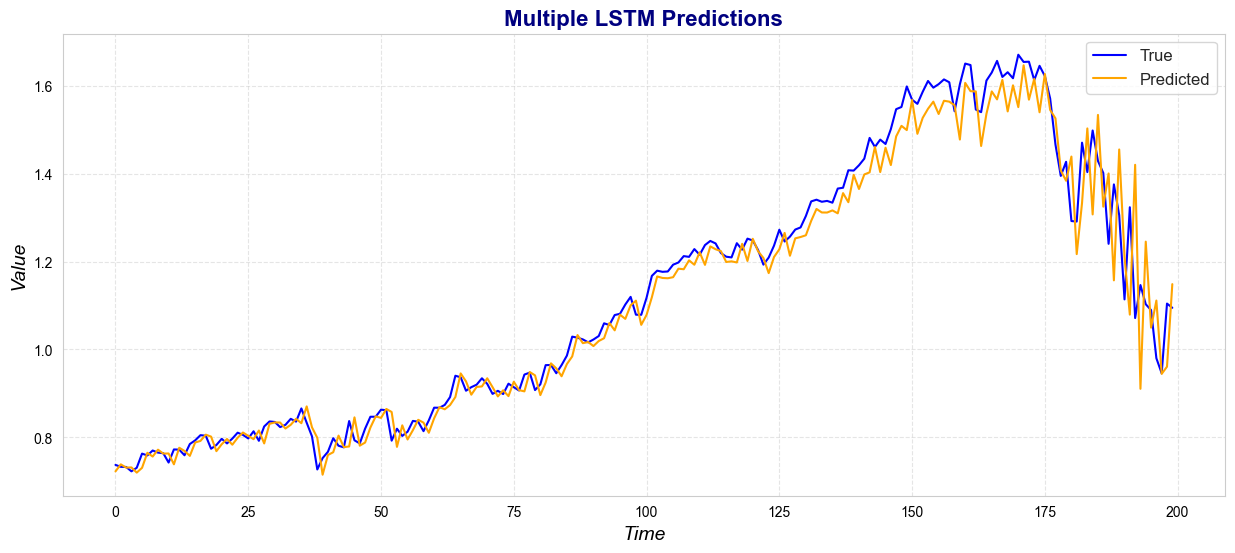

,Model,RMSE,MAE,R2,MSE,MAPE,MSLE
14,Multiple LSTM,0.061652,0.03869,0.956342,0.003801,30.508109,0.000754


In [66]:
plot_train_history(history_lstm_gru)
best_model = load_model('best_model.keras')
test_model(model_lstm_gru, 'Multiple LSTM',
           X_test, y_test, 200)